In [2]:
from scipy.stats import multivariate_normal, norm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


## Investigating impact of incremental covariance on multivariate normal

![relation of covariance and correlation in 2d normal](resources/cov_corr.png)

- From the above, we get that the PDF and covariance matrix of a 2D normal looks like the following:

![helo](resources/pdf_covmatrix.png)

- Given this, let's see how incremental covariance between two variables impacts their behavior on a 2D plot.

In [8]:
# We want five different 'cluster locations', each with increasing covariance.
mulist = [[5*x,0] for x in range(0,5,1)]

# Defining standard deviations of each coordinate
sds = [1,1]
rhorange = np.arange(0,0.23*5,0.23)

# Defining our plotting parameters
minunit = 0.01
x = np.arange(-3, mulist[-1][0]+3, minunit)
y = np.arange(-3, 3, minunit)

pdflist = []
for idx,mu in enumerate(mulist):
    pdf = multivariate_normal(
        mean = [mu[0],mu[1]],
        cov = [[sds[0]**2, rhorange[idx]*sds[0]*sds[1]],[rhorange[idx]*sds[0]*sds[1], sds[1]**2]]
    )
    X, Y = np.meshgrid(x,y)
    pos = np.dstack((X,Y))

    Z = pdf.pdf(pos)
    pdflist.append(Z)

 

- Visualizing...

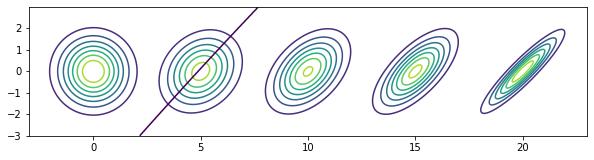

In [12]:
plt.figure(figsize=(10,20))
plt.gca().set_aspect("equal")

for idx,pdf in enumerate(pdflist):
    cs = plt.contour(X, Y, pdf)

plt.savefig('/home/dante/ML/PS4/rt_by_n_dfix.png')

plt.savefig(os.path.join(fileloc,'resources/cov_on_pdf.pdf'))
plt.show()